# Cityscapes Dataset

### Load the Dataset from the local directory via "tensorflow_datasets" and prepare it

In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import time
import tensorflow_datasets as tfds
import numpy as np

# Load the Cityscapes dataset
dataset, info = tfds.load('cityscapes', split='train', with_info=True)
val_dataset = tfds.load('cityscapes', split='validation')
test_dataset = tfds.load('cityscapes', split='test')

# Define preprocessing functions

def preprocess_image(features):
    image = features['image_left']
    label = features['segmentation_label']
    image = tf.image.resize(image, (256, 512))
    label = tf.image.resize(label, (256, 512), method='nearest')
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.cast(label, tf.int32)
    return image, label
    


# Preprocess the dataset
dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset = dataset.batch(2).prefetch(tf.data.experimental.AUTOTUNE)

val_dataset = val_dataset.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(2).prefetch(tf.data.experimental.AUTOTUNE)

test_dataset = test_dataset.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(1).prefetch(tf.data.experimental.AUTOTUNE)

2024-07-30 12:39:59.627992: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 12:40:00.348432: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 12:40:00.806090: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-30 12:40:01.888716: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-30 12:40:15.362145: W tensorflow/compiler/tf2

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter serve

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2975 [00:00<?, ? examples/s]

Shuffling /home/jeggeb/tensorflow_datasets/cityscapes/semantic_segmentation/incomplete.6OCUAI_1.0.0/cityscapes…

Generating validation examples...:   0%|          | 0/500 [00:00<?, ? examples/s]

Shuffling /home/jeggeb/tensorflow_datasets/cityscapes/semantic_segmentation/incomplete.6OCUAI_1.0.0/cityscapes…

Generating test examples...:   0%|          | 0/1525 [00:00<?, ? examples/s]

Shuffling /home/jeggeb/tensorflow_datasets/cityscapes/semantic_segmentation/incomplete.6OCUAI_1.0.0/cityscapes…

Dataset cityscapes downloaded and prepared to /home/jeggeb/tensorflow_datasets/cityscapes/semantic_segmentation/1.0.0. Subsequent calls will reuse this data.


I0000 00:00:1722339277.977623    1124 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1722339282.784172    1124 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1722339282.784256    1124 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1722339283.971710    1124 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1722339283.971826    1124 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [2]:
print("Dataset info:", info)

Dataset info: tfds.core.DatasetInfo(
    name='cityscapes',
    full_name='cityscapes/semantic_segmentation/1.0.0',
    description="""
    Cityscapes is a dataset consisting of diverse urban street scenes across 50
    different cities at varying times of the year as well as ground truths for
    several vision tasks including semantic segmentation, instance level
    segmentation (TODO), and stereo pair disparity inference.
    
    For segmentation tasks (default split, accessible via
    'cityscapes/semantic_segmentation'), Cityscapes provides dense pixel level
    annotations for 5000 images at 1024 * 2048 resolution pre-split into training
    (2975), validation (500) and test (1525) sets. Label annotations for
    segmentation tasks span across 30+ classes commonly encountered during driving
    scene perception. Detailed label information may be found here:
    https://github.com/mcordts/cityscapesScripts/blob/master/cityscapesscripts/helpers/labels.py#L52-L99
    
    Cityscap

### Count Labels per Dataset (Train, Test, Val)

In [4]:
def count_labels(dataset):
    label_counts = {}
    for images, labels in dataset:
        unique_labels, counts = np.unique(labels.numpy(), return_counts=True)
        for label, count in zip(unique_labels, counts):
            if label in label_counts:
                label_counts[label] += count
            else:
                label_counts[label] = count
    return label_counts

for example in dataset.take(1):
    print(example)


# Count labels in the training dataset
train_label_counts = count_labels(dataset)
print("Training Dataset Label Counts:", train_label_counts)

# Count labels in the validation dataset
val_label_counts = count_labels(val_dataset)
print("Validation Dataset Label Counts:", val_label_counts)

test_label_counts = count_labels(test_dataset)
print("Testing Dataset Label Counts:", test_label_counts)

print("Unique Train Labels:", len(train_label_counts))
print("Unique Val Labels:", len(val_label_counts))  
print("Unique Test Labels:", len(test_label_counts))

(<tf.Tensor: shape=(2, 256, 512, 3), dtype=float32, numpy=
array([[[[0.18921569, 0.28627452, 0.20196079],
         [0.09215686, 0.13235295, 0.11372549],
         [0.0754902 , 0.10784314, 0.10196079],
         ...,
         [0.10196079, 0.13725491, 0.10294118],
         [0.10196079, 0.13137256, 0.09901961],
         [0.10392157, 0.13725491, 0.09803922]],

        [[0.16666667, 0.25588235, 0.20980392],
         [0.09509804, 0.13627452, 0.11862745],
         [0.08137255, 0.11078431, 0.10294118],
         ...,
         [0.10392157, 0.13627452, 0.10686275],
         [0.10196079, 0.13431373, 0.10392157],
         [0.10196079, 0.13529412, 0.10392157]],

        [[0.28529412, 0.3245098 , 0.32058823],
         [0.09607843, 0.13627452, 0.12156863],
         [0.08039216, 0.11176471, 0.10294118],
         ...,
         [0.10294118, 0.13529412, 0.10490196],
         [0.09607843, 0.12745099, 0.10294118],
         [0.09901961, 0.13235295, 0.10392157]],

        ...,

        [[0.14901961, 0.19117647,

2024-07-30 14:28:45.773642: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation Dataset Label Counts: {1: 3249610, 3: 766000, 4: 979373, 5: 278560, 7: 21600943, 8: 3106417, 9: 260080, 11: 12589806, 12: 421139, 13: 471394, 17: 848259, 18: 4963, 19: 113109, 20: 381930, 21: 9948505, 23: 1927788, 24: 745694, 25: 123569, 26: 3741620, 27: 172704, 28: 222849, 32: 45688, 33: 407327, 2: 1315242, 6: 1169616, 22: 477762, 0: 23623, 10: 40004, 31: 64473, 15: 19512, 29: 3348, 30: 12650, 14: 2443}
Testing Dataset Label Counts: {0: 186059001, 1: 9129945, 3: 2336300, 2: 2359554}
Unique Train Labels: 34
Unique Val Labels: 33
Unique Test Labels: 4


### Example Image and Segmentation Map plotted

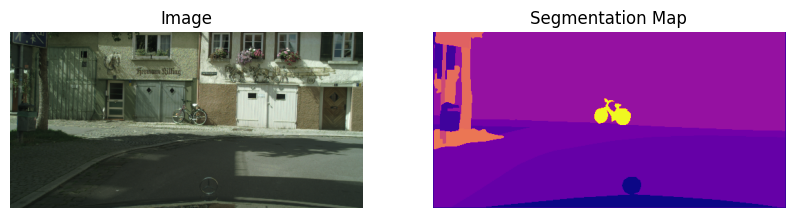

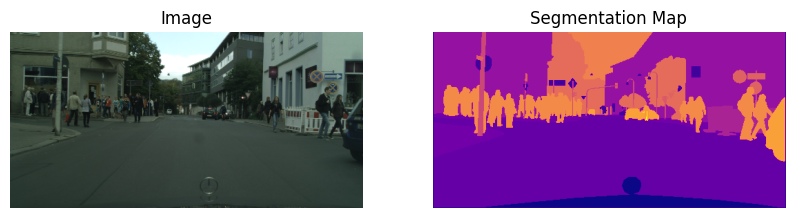

In [4]:
import matplotlib.pyplot as plt

def display_image_and_segmentation(image, label):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image)
    axes[0].set_title("Image")
    axes[0].axis('off')
    axes[1].imshow(label, cmap='plasma')
    axes[1].set_title("Segmentation Map")
    axes[1].axis('off')
    plt.show()

# Get a batch of images and labels
for images, labels in dataset.take(1):
    # Convert tensors to numpy arrays
    images = images.numpy()
    labels = labels.numpy()

    # Display the first image and its segmentation map in the batch
    display_image_and_segmentation(images[0], labels[0])

    # Display the second image and its segmentation map in the batch (if exists)
    if images.shape[0] > 1:
        display_image_and_segmentation(images[1], labels[1])